In [158]:
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import pandas as pd
import fix_yahoo_finance as yf # This is a fix for getting series from Yahoo 

yf.pdr_override() # This fix the problem
start_sp = datetime.datetime(2008,12,31)
end_sp = datetime.datetime(2018,12,31)

# Dow Jones index
# 1st Dow Jones Index + 30 components
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DWDP', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

dow30 = sorted(dow30)

adj_close = pdr.get_data_yahoo(dow30, start_sp, end_sp)['Adj Close']


[*********************100%***********************]  31 of 31 downloaded


In [145]:
# 1.1 a) Rendements quotidiens

# Comme il n'y a pas eu de dividende versé pour ces stocks pour la période selectionnée, 
# le rendement quotidien n'a pas été ajuste en fonction du dividende

stock_returns = dict()

for ticker in dow30:
    stock_returns[ticker] = adj_close[ticker].pct_change(1)
    print(stock_returns[ticker])
    

Date
2008-12-31         NaN
2009-01-02    0.063269
2009-01-05    0.042204
2009-01-06   -0.016494
2009-01-07   -0.021608
2009-01-08    0.018570
2009-01-09   -0.022870
2009-01-12   -0.021197
2009-01-13   -0.010715
2009-01-14   -0.027135
2009-01-15   -0.022853
2009-01-16   -0.012592
2009-01-20   -0.050164
2009-01-21    0.059207
2009-01-22    0.066763
2009-01-23    0.000000
2009-01-26    0.014486
2009-01-27    0.012160
2009-01-28    0.038246
2009-01-29   -0.012739
2009-01-30   -0.030860
2009-02-02    0.015311
2009-02-03    0.016064
2009-02-04    0.006130
2009-02-05    0.031106
2009-02-06    0.033797
2009-02-09    0.027978
2009-02-10   -0.045654
2009-02-11   -0.010324
2009-02-12    0.025305
                ...   
2018-11-15    0.024679
2018-11-16    0.011076
2018-11-19   -0.039632
2018-11-20   -0.047778
2018-11-21   -0.001130
2018-11-23   -0.025399
2018-11-26    0.013524
2018-11-27   -0.002176
2018-11-28    0.038453
2018-11-29   -0.007682
2018-11-30   -0.005402
2018-12-03    0.034942
2018-1

In [146]:
# 1.1 b) Rendements périodiques moyens

average_daily_returns = dict()

for ticker in dow30:
    average_daily_returns[ticker] = stock_returns[ticker].mean()
    
print('Rendements périodiques moyens')
print(average_daily_returns)

Rendements périodiques moyens
{'AAPL': 0.0013202448989875118, 'AXP': 0.0009245086451141904, 'BA': 0.0010478188481857058, 'CAT': 0.0007246376201306057, 'CSCO': 0.0006148462308148982, 'CVX': 0.00039857232917932977, 'DIS': 0.0007905209027196208, 'DWDP': 0.0008629110210926115, 'GE': 1.2991464659593923e-05, 'GS': 0.0005201235149731993, 'HD': 0.0009943930632592124, 'IBM': 0.00031584398072033936, 'INTC': 0.0007207493308132279, 'JNJ': 0.00047316086686824546, 'JPM': 0.0007867805971843057, 'KO': 0.0005084543183675944, 'MCD': 0.0005972064445457121, 'MMM': 0.0006606748907626654, 'MRK': 0.0006066020692529421, 'MSFT': 0.0008779396102024788, 'NKE': 0.0009762293264469309, 'PFE': 0.0005907725403725847, 'PG': 0.00033396673862101103, 'TRV': 0.0005736481196396519, 'UNH': 0.0010866566828013667, 'UTX': 0.0004551532718326919, 'V': 0.0011374157219567423, 'VZ': 0.0004894995605250851, 'WMT': 0.00036583681693622816, 'XOM': 0.00013131962707641152, '^DJI': 0.00043644716296127963}


In [147]:
# 1.1 c) Écart-type

std = dict()

for ticker in dow30:
    std[ticker] = stock_returns[ticker].std()
    
print('Écart-Type')
print(std)

Écart-Type
{'AAPL': 0.016901961085724504, 'AXP': 0.02044305034571212, 'BA': 0.01659163237842293, 'CAT': 0.019315042425473276, 'CSCO': 0.01660153930850303, 'CVX': 0.013993202786147432, 'DIS': 0.01481628702710398, 'DWDP': 0.02177781498655828, 'GE': 0.018389869951720685, 'GS': 0.019850369488946817, 'HD': 0.013915732682523115, 'IBM': 0.012900866804981613, 'INTC': 0.01625271812366563, 'JNJ': 0.009546217977988896, 'JPM': 0.022298232727317322, 'KO': 0.009815135036054252, 'MCD': 0.010383361939936699, 'MMM': 0.012771650727934526, 'MRK': 0.013554112548704195, 'MSFT': 0.01562305315430665, 'NKE': 0.01605929683712113, 'PFE': 0.012618326417209854, 'PG': 0.00998274504807059, 'TRV': 0.013156651600230681, 'UNH': 0.01680417251478571, 'UTX': 0.013167036163926213, 'V': 0.016410606002289916, 'VZ': 0.011266987753924, 'WMT': 0.011382107817027304, 'XOM': 0.012244105171928359, '^DJI': 0.009777400578131977}


Matrice de Corrélation
          AAPL       AXP        BA       CAT      CSCO       CVX       DIS  \
AAPL  1.000000  0.886457  0.940398  0.841079  0.924506  0.814177  0.916916   
AXP   0.886457  1.000000  0.841334  0.837639  0.787705  0.921416  0.874173   
BA    0.940398  0.841334  1.000000  0.888152  0.956490  0.779236  0.787863   
CAT   0.841079  0.837639  0.888152  1.000000  0.791758  0.870550  0.675238   
CSCO  0.924506  0.787705  0.956490  0.791758  1.000000  0.701869  0.811939   
CVX   0.814177  0.921416  0.779236  0.870550  0.701869  1.000000  0.779228   
DIS   0.916916  0.874173  0.787863  0.675238  0.811939  0.779228  1.000000   
DWDP  0.944624  0.885483  0.887603  0.850573  0.879013  0.841133  0.925164   
GE    0.394153  0.462258  0.150735  0.171616  0.213084  0.470999  0.674104   
GS    0.838043  0.767769  0.829431  0.719173  0.864278  0.656049  0.813277   
HD    0.973714  0.857572  0.930270  0.805834  0.933688  0.805321  0.930904   
IBM   0.413996  0.626469  0.299052  0.567

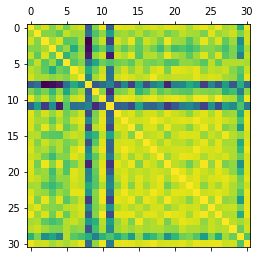

In [148]:
# 1.1 d) Matrice de corrélation

correlation_matrix = adj_close.corr()

print("Matrice de Corrélation")
print(adj_close.corr())

plt.matshow(correlation_matrix)
plt.show()

Portefeuille Minimum Variance Sans Contrainte
Somme des poids:  1.0
Rendement Portefeuille :  0.0004621057599439802
Variance Portefeuille :  0.007416317232996797


Portefeuille Minimum Variance Avec Contraintes
Somme des poids:  1.0000000000000002
Rendement Portefeuille :  0.0005809406947311517
Variance Portefeuille :  0.00866580141455468


Portefeuille Max Rendement 90%
Somme des poids:  1.0000000000000002
Rendement Portefeuille :  0.0011882204090229755
Variance Portefeuille :  0.012307295495245908




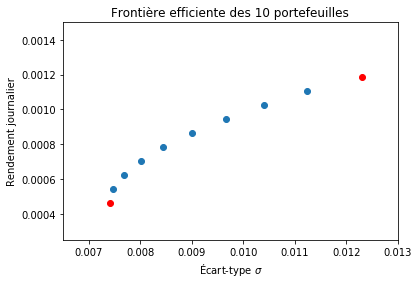

In [179]:
from scipy.optimize import minimize

# 1.2 Portefeuille à variance minimale

daily_return = adj_close.pct_change(1)
daily_return = daily_return.drop(['^DJI'], axis = 1) 
daily_yield_average = daily_return.mean(axis = 0)
cov = daily_return.cov()
initial_weights = np.full((daily_return.shape[1],1), 1 / daily_return.shape[1])


def print_details(weight_sum, yield_porfolio, std_portfolio):
    print('Somme des poids: ', np.sum(weight_sum))
    print('Rendement Portefeuille : ', np.sum(yield_porfolio))
    print('Variance Portefeuille : ', std_portfolio)
    print('\n')

def calculate_portfolio_var(w,cov):
    return np.sqrt(np.dot(w.T, np.dot(cov, w)))

def minimize_var(const, bounds):
    data = minimize(calculate_portfolio_var, initial_weights, args = cov, constraints = const, bounds = bounds)
    weights_p = data.x
    yield_p = weights_p * daily_yield_average
    std_p = np.sqrt(np.dot(weights_p.T, np.dot(cov, weights_p)))
    return [weights_p, yield_p, std_p]


# Sans contrainte
const = {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}
bounds = [(0,None) for x in range(daily_return.shape[1])]

data_no_constraints = minimize_var(const, bounds)

print('Portefeuille Minimum Variance Sans Contrainte')
print_details(data_no_constraints[0], data_no_constraints[1], data_no_constraints[2])


# # 1.3 - Avec Contrainte poids max et poids min
const = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0})
bounds = [(0.02,0.20) for x in range(daily_return.shape[1])]

data_constraints = minimize_var(const, bounds)
print('Portefeuille Minimum Variance Avec Contraintes')
print_details(data_constraints[0], data_constraints[1], data_constraints[2])


# Calcul 90% du Rendement Maximal
max_yield = np.max(daily_yield_average)
max_yield_ninety = 0.9 * max_yield


# Portefeuille en fonction du Rendement max 90%
const = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1.0},{'type': 'eq','fun': lambda x:np.sum(x * daily_yield_average) - max_yield_ninety})
bounds = [(0,None) for x in range(daily_return.shape[1])]

data_max_ninety = minimize_var(const, bounds)
print('Portefeuille Max Rendement 90%')
print_details(data_max_ninety[0], data_max_ninety[1], data_max_ninety[2])


# 1.4 - Calcul des points de la frontière

interval = np.linspace(np.sum(data_no_constraints[1]), np.sum(data_max_ninety[1]), num = 10)
intervals = interval[1:-1]
weights = []

for i in range (0,len(intervals)):

    const = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1.0}, {'type': 'eq','fun': lambda x:(np.sum(x * daily_yield_average)) - intervals[i]})
    bounds = [(0, None) for x in range(daily_return.shape[1])]
    data = minimize_var(const, bounds)
    
    weights.append(data[0])

    
yield_p = []
volatility_p = []

for i in range (0, len(weights)):
    yield_p.append(np.sum(weights[i] * daily_yield_average))
    volatility_p.append(np.sqrt(np.dot(weights[i].T, np.dot(cov, weights[i])))) 
        
figure = plt.subplot(1, 1, 1)
figure.scatter(volatility_p, yield_p)
figure.plot(data_max_ninety[2], np.sum(data_max_ninety[1]), "or")
figure.plot(data_no_constraints[2], np.sum(data_no_constraints[1]), "or")
plt.xlim(0.0065, 0.013)  
plt.ylim(0.00025, 0.00150)
plt.xlabel('Écart-type $\sigma$')
plt.ylabel('Rendement journalier')
plt.title('Frontière efficiente des 10 portefeuilles')
plt.show()
    

In [178]:
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy.stats as sp
import math 


#2 - VaR

daily_return = adj_close.pct_change(1)
daily_return = daily_return.drop(['^DJI'], axis = 1)
equal_weigths = np.full((daily_return.shape[1], 1), 1 / daily_return.shape[1])

# 2.1 - VaR historique sur 250 jours

last_250 = equal_weigths.T * daily_return[-250:]
yield_250 = last_250.sum(axis = 1)
ordered_yield_250 = sorted(yield_250)

position = math.ceil(0.05*len(ordered_yield_250))
VaR5 = ordered_yield_250[position]*np.sqrt(50)
print("VaR historique sur 250 jours : ", VaR5)


# 2.2 - VaR paramétrique sur tout l'échantillon

all_values = equal_weigths.T * daily_return
yield_p = all_values.sum(axis = 1)
mu = yield_p.mean(axis = 0)
std = yield_p.std(axis = 0)
VaR_daily_95 = mu - (1,96 * std)
VaR_5_days = VaR_daily_95 * (np.sqrt(5))
print("VaR paramétrique 95% : ", VaR_5_days.mean())

# 2.3 - VaR avec correction Cornish Fisher

zc = sp.norm.ppf(0.99, loc=0, scale=1)
skewness = skew(yield_p)
kurt = kurtosis(yield_p)

zcf = zc + (((zc**2-1)*skewness)/6) + (((zc**3-3*zc)*kurt)/24)- ((((2*zc**3)-5*zc)*skewness**2)/36)
VaR = (mu - (zcf * std)) 

VaR_cornish_fisher = VaR * np.sqrt(5)
print('VaR avec correction Cornish Fisher : ', VaR_cornish_fisher)

# 2.4 - VaR RiskMetrics avec alpha = 0.97

alpha = 0.97
daily_yield_6_months = np.array_split(yield_p, 30)
initial_yield_average = daily_yield_6_months[0].mean(axis = 0)
initial_std = daily_yield_6_months[0].std(axis=0)

for i in range (1,len(daily_yield_6_months)):
    std = np.sqrt((alpha * initial_std**2) + ((1 - alpha) * initial_yield_average**2))
    initial_std = std
    initial_yield_average = initial_yield_average = daily_yield_6_months[i].mean(axis=0)
  
 
nb_periods = (6 * 30) / 5 # Nombre de période de 5 jours au cours de 6 mois
six_month_VaR = (1.96 * std)
VaR_5_days_fischer = six_month_VaR / np.sqrt(nb_periods)
print('VaR à la RiskMetrics : ', VaR_5_days_fischer)


VaR historique sur 250 jours :  -0.14810139774727712
VaR paramétrique 95% :  -2.210537176966959
VaR avec correction Cornish Fisher :  -0.08377124558190976
VaR à la RiskMetrics :  0.00541748078113987


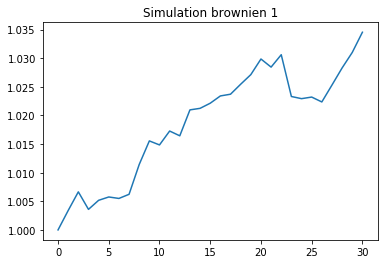

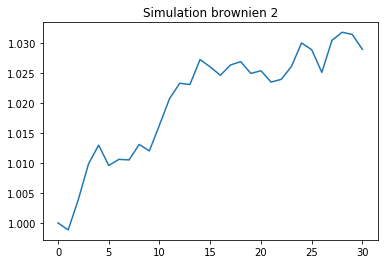

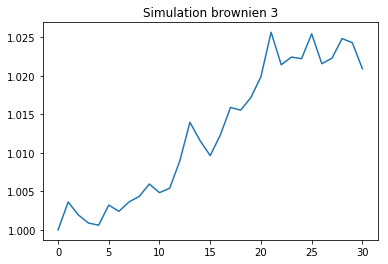

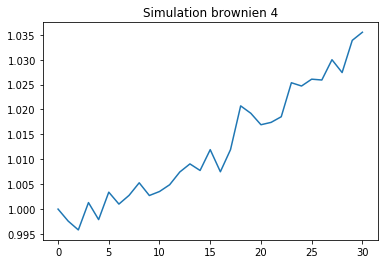

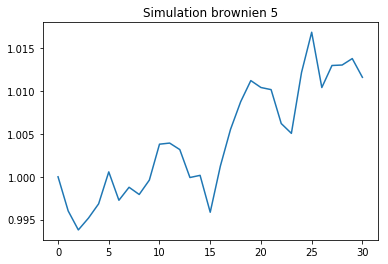

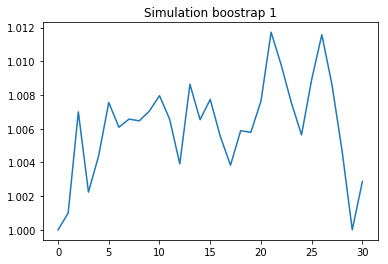

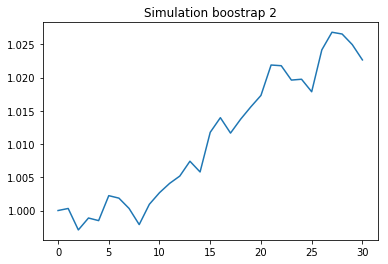

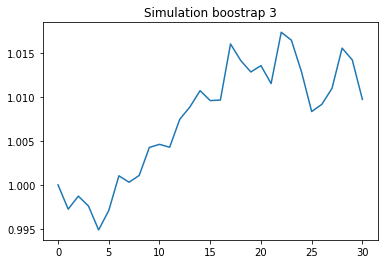

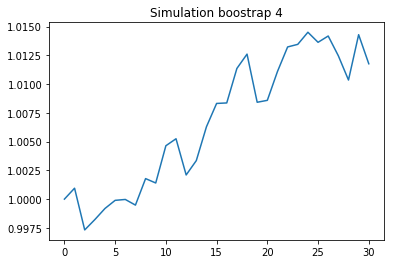

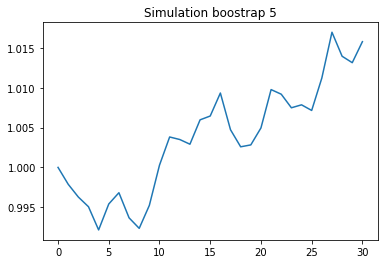

In [141]:
#3. Simulation de la valeur d'un portefeuille

import math
from random import randint

std = dict()
for ticker in dow30:
    std[ticker] = stock_returns[ticker].std()
    
def brownian_movement(s0, mu, sigma, t):
    dz = np.random.normal(0, 1)
    return s0 + s0*(mu*t + sigma*dz)

def generate_brownian(prices):
    next_prices = []
    for i in range(30):
        s0 = prices[i][1]
        ticker = prices[i][0]
        mu = average_daily_returns[ticker]
        sigma = std[ticker]
        t = 1
        next_prices.append((ticker, brownian_movement(s0, mu, sigma, t)))
    return next_prices

def portfolio_value(prices, shares):
    return sum([prices[i][1]*shares[i] for i in range(30)])

def bootstrap_movement(s0, ticker):
    random_index = randint(0, len(stock_returns[ticker]) - 1)
    random_return = stock_returns[ticker][random_index]
    return s0 + s0*(stock_returns[ticker][random_index])

def generate_bootstrap(prices):
    next_prices = []
    for i in range(30):
        s0 = prices[i][1]
        ticker = prices[i][0]
        next_prices.append((ticker, bootstrap_movement(s0, ticker)))
    return next_prices

def generate_simulation(is_brownian):
    simulation_nb = 1
    title = ''
    for simulation in range(5):
        dow30_clean = dow30[0:30]
        weight = 1/30
        historical_prices = list()
        historical_prices.append([(ticker, adj_close[ticker][-1]) for ticker in dow30_clean])
        historical_values = list()
        historical_values.append(1)
        shares = [weight/price[1] for price in historical_prices[-1]]
        for day in range(30):
            if is_brownian:
                historical_prices.append(generate_brownian(historical_prices[-1]))
                title = 'Simulation brownien '
            else:
                historical_prices.append(generate_bootstrap(historical_prices[-1]))
                title = 'Simulation boostrap '
            historical_values.append(portfolio_value(historical_prices[-1], shares))
        plt.plot(historical_values)
        plt.title(title + str(simulation_nb))
        plt.show()
        simulation_nb = simulation_nb + 1
        
        
# Simulation brownian     
generate_simulation(True)

    
# Simulation bootstrap
generate_simulation(False)

/home/chloe/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


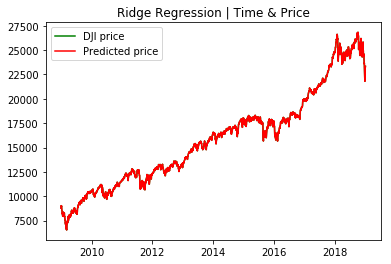

In [115]:
# Question 4 - Scikit Learn

from sklearn.linear_model import Ridge

# Ridge Regression with prices - no optimization

X = adj_close.loc['2008-03-20':]
dowjones = adj_close['^DJI']
Y = dowjones.loc['2008-03-20':]
ridge_regression = Ridge(alpha=1) 
ridge_regression.fit(X,Y)
prediction = ridge_regression.predict(X)
dates = Y.index.tolist()

plt.plot(dates, Y.tolist(), color='green', label= 'DJI price')
plt.plot(dates, prediction, color='red', label = 'Predicted price')
plt.title('Ridge Regression | Time & Price')
plt.legend()
plt.show()


In [ ]:
# Ridge optimized

# L'optimization par contrainte n'est pas offerte avec Scikit Learn. De ce fait, il est impossible d'ajouter
# les contraintes voulues du devoir. On peut se douter qu'avec ces contraintes, les resultats ne seraient pas
# meilleurs puisque Scikit est concu pour donner les meilleurs resultats selon les donnes